In [2]:
import numpy as np

size, seq_len = 100, 3 

#비어있는 numpy array 생성
X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

for i in range(size):
    # [0, 0.1, 0.2], [0.1, 0.2, 0.3] 같은 시퀀스를 만든다
    c = np.linspace(i/10., (i+seq_len-1)/10., seq_len)
    X[i] = c[:, np.newaxis]     # 새로운 축을 하나 더 추가함
    Y[i] = (i+seq_len) / 10     # 목표값을 생성함
    
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]] 0.3
[[0.1]
 [0.2]
 [0.3]] 0.4
[[0.2]
 [0.3]
 [0.4]] 0.5
[[0.3]
 [0.4]
 [0.5]] 0.6
[[0.4]
 [0.5]
 [0.6]] 0.7
[[0.5]
 [0.6]
 [0.7]] 0.8
[[0.6]
 [0.7]
 [0.8]] 0.9
[[0.7]
 [0.8]
 [0.9]] 1.0
[[0.8]
 [0.9]
 [1. ]] 1.1
[[0.9]
 [1. ]
 [1.1]] 1.2
[[1. ]
 [1.1]
 [1.2]] 1.3
[[1.1]
 [1.2]
 [1.3]] 1.4
[[1.2]
 [1.3]
 [1.4]] 1.5
[[1.3]
 [1.4]
 [1.5]] 1.6
[[1.4]
 [1.5]
 [1.6]] 1.7
[[1.5]
 [1.6]
 [1.7]] 1.8
[[1.6]
 [1.7]
 [1.8]] 1.9
[[1.7]
 [1.8]
 [1.9]] 2.0
[[1.8]
 [1.9]
 [2. ]] 2.1
[[1.9]
 [2. ]
 [2.1]] 2.2
[[2. ]
 [2.1]
 [2.2]] 2.3
[[2.1]
 [2.2]
 [2.3]] 2.4
[[2.2]
 [2.3]
 [2.4]] 2.5
[[2.3]
 [2.4]
 [2.5]] 2.6
[[2.4]
 [2.5]
 [2.6]] 2.7
[[2.5]
 [2.6]
 [2.7]] 2.8
[[2.6]
 [2.7]
 [2.8]] 2.9
[[2.7]
 [2.8]
 [2.9]] 3.0
[[2.8]
 [2.9]
 [3. ]] 3.1
[[2.9]
 [3. ]
 [3.1]] 3.2
[[3. ]
 [3.1]
 [3.2]] 3.3
[[3.1]
 [3.2]
 [3.3]] 3.4
[[3.2]
 [3.3]
 [3.4]] 3.5
[[3.3]
 [3.4]
 [3.5]] 3.6
[[3.4]
 [3.5]
 [3.6]] 3.7
[[3.5]
 [3.6]
 [3.7]] 3.8
[[3.6]
 [3.7]
 [3.8]] 3.9
[[3.7]
 [3.8]
 [3.9]] 4.0
[[3.8]
 [3.9

In [3]:
import tensorflow as tf

# units는 SimpleRNN 레이어에 있는 뉴런의 수
# return_sequences는 출력으로 시퀀스 전체를 출력할지 묻는 옵션
# input_shape[3, 1]에서는 3은 timesteps, 1은 입력차원
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 20, return_sequences=False,
                              input_shape=[3, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 20)                440       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [4]:
import matplotlib.pyplot as plt
history = model.fit(X, Y, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 41.7495
Epoch 2/300
4/4 [==============================] - 0s 1000us/step - loss: 40.2244
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 38.7255
Epoch 4/300
4/4 [==============================] - 0s 1ms/step - loss: 37.3292
Epoch 5/300
4/4 [==============================] - 0s 1ms/step - loss: 35.9014
Epoch 6/300
4/4 [==============================] - 0s 1ms/step - loss: 34.5166
Epoch 7/300
4/4 [==============================] - 0s 1000us/step - loss: 33.1475
Epoch 8/300
4/4 [==============================] - 0s 1ms/step - loss: 31.7689
Epoch 9/300
4/4 [==============================] - 0s 1ms/step - loss: 30.4437
Epoch 10/300
4/4 [==============================] - 0s 998us/step - loss: 29.0933
Epoch 11/300
4/4 [==============================] - 0s 1ms/step - loss: 27.6814
Epoch 12/300
4/4 [==============================] - 0s 1ms/step - loss: 26.2553
Epoch 13/300
4/4 [=======================

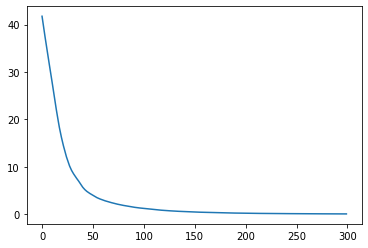

4/4 [==============================] - 0s 991us/step


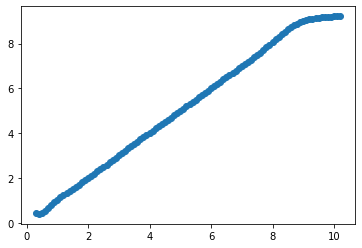

In [5]:
plt.plot(history.history['loss'])
plt.show()
y_hat = model.predict(X)
plt.scatter(Y, y_hat)
plt.show()

In [6]:
print(model.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model.predict(np.array([[[10.4], [10.5], [10.6]]])))

1/1 [==============================] - 0s 12ms/step
[[9.225399]]
1/1 [==============================] - 0s 13ms/step
[[9.228872]]


In [7]:
# 유닛의 수를 256개로 대폭 늘여서 개선된 모델
model256 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 256, return_sequences=False,
                              input_shape=[3, 1]),
    tf.keras.layers.Dense(1)
])

model256.compile(optimizer ='adam', loss = 'mse')
model256.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 18.2319
Epoch 2/300
4/4 [==============================] - 0s 1ms/step - loss: 4.6608
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 4.3974
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 2.0781
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 2.4423
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 1.0230
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 1.2598
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.5696
Epoch 9/300
4/4 [==============================] - 0s 1ms/step - loss: 0.5731
Epoch 10/300
4/4 [==============================] - 0s 1ms/step - loss: 0.3351
Epoch 11/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2954
Epoch 12/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1954
Epoch 13/300
4/4 [==============================] - 0s 2ms/s

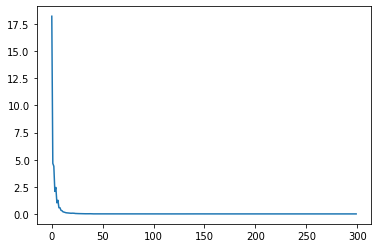

In [8]:
history = model256.fit(X, Y, epochs=300)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

4/4 [==============================] - 0s 1ms/step


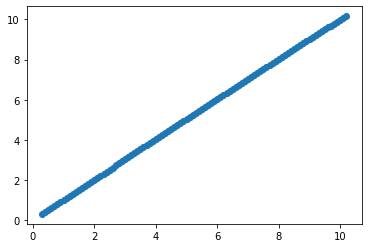

In [9]:
y_hat = model256.predict(X)
plt.scatter(Y, y_hat)

In [10]:
print(model256.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model256.predict(np.array([[[10.4], [10.5], [10.6]]])))

1/1 [==============================] - 0s 12ms/step
[[10.4248]]
1/1 [==============================] - 0s 14ms/step
[[10.597173]]


#### 10.6 RNN을 다층구조로 만들어 적은 수의 파라미터로 좋은 성능을 내자

In [1]:
import tensorflow as tf

model_multilayer = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 34, input_shape=[3, 1],
                                          return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34),
    tf.keras.layers.Dense(1) ])
model_multilayer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3, 34)             1224      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 3, 34)             2346      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 3, 34)             2346      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 34)                2346      
                                                                 
 dense (Dense)               (None, 1)                 35        
                                                                 
Total params: 8,297
Trainable params: 8,297
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
4/4 [==============================] - 1s 3ms/step - loss: 33.2305
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 16.3013
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 8.6356
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 5.9360
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 5.3582
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 4.8420
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 4.2347
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 3.5672
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 2.9535
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 2.3810
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 1.9903
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 1.6716
Epoch 13/300
4/4 [==============================] - 0s 2ms/

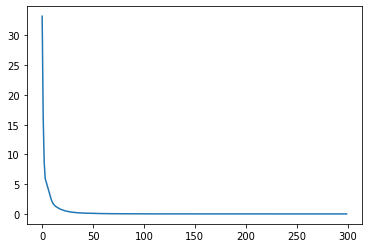

In [12]:
model_multilayer.compile(optimizer = 'adam', loss = 'mse')
history = model_multilayer.fit(X, Y, epochs=300)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

4/4 [==============================] - 0s 1ms/step


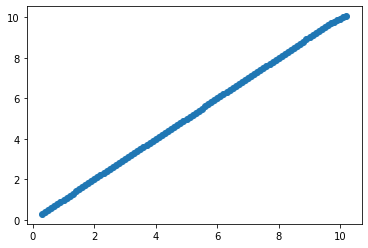

In [13]:
y_hat = model_multilayer.predict(X)
plt.scatter(Y, y_hat)

In [16]:
print(model_multilayer.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model_multilayer.predict(np.array([[[10.4], [10.5], [10.6]]])))

1/1 [==============================] - 0s 12ms/step
[[10.176737]]
1/1 [==============================] - 0s 16ms/step
[[10.228653]]


### 10.12 단순 RNN과 LSTM, GRU 모델의 비교 (1) - 시퀀스 데이터 준비

In [21]:
import numpy as np

# 0.0, 0.1, .. 증가하는 시퀀스 데이터를 생성함
# seq_len 길이를 가지는 시퀀스 데이터를 size 갯수만큼 생성한다
def sequence_gen(size, seq_len):
    # 비어있는 numpy array를 생성한다.
    seq_X = np.empty(shape=(size, seq_len, 1))
    Y = np.empty(shape=(size,))
    
    for i in range(size):
        # [0, 0.1, 0.2, ..] 같은 시퀀스와 Y 값을 size 갯수만큼 생성
        c = np.linspace(i/10, (i+seq_len-1)/10, seq_len)
        seq_X[i] = c[:, np.newaxis]     # 새로운 축을 하나 더 추가함
        Y[i] = (i+seq_len) / 10         # 목표값을 생성함
    
    return seq_X, Y

# 길이가 16인 시퀀스 8개를 훈련용으로 만든다
n, seq_len = 8, 16
train_seq_X, train_Y = sequence_gen(n, seq_len)

In [22]:
print('훈련용 데이터')
for i in range(n):
    print(train_seq_X[i].flatten(), train_Y[i])

half_n, offset = int(n/2), 1.0
test_seq_X = train_seq_X[:half_n] + offset
test_Y = train_Y[:half_n] + offset

print('검증용 데이터')
for i in range(half_n):
    print(test_seq_X[i].flatten(), test_Y[i])

훈련용 데이터
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 1.6
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6] 1.7
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7] 1.8
[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 1.9
[0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9] 2.0
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ] 2.1
[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1] 2.2
[0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2] 2.3
검증용 데이터
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5] 2.6
[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6] 2.7
[1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7] 2.8
[1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8] 2.9


In [23]:
from pickletools import optimize
import tensorflow as tf
n_units = 256
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = n_units, return_sequences=False,
                              input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

simpleRNN_model.compile(optimizer = 'adam', loss = 'mse')
simpleRNN_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 482ms/step - loss: 4.6565
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3262
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4031
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4852
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1512
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2934
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1577
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0186
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0259
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1037
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1168
Epoch 13/100
1/1 [==============================] - 0s 4ms/

In [24]:
# simpleRNN_model의 predict() 메소드에 테스터용 데이터를 넣어서 정답 예측을 잘하는지 체크
result = simpleRNN_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

1/1 [==============================] - 0s 73ms/step
예측값 : [2.4379892 2.4854636 2.5286715 2.5681682]
실제값 : [2.6 2.7 2.8 2.9]


In [26]:
# 단순 LSTM 모델을 만들고 예측값과 실제값을 출력
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = n_units, return_sequences=False,
                         input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer='adam', loss='mse')
LSTM_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 922ms/step - loss: 4.2381
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 3.0495
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 2.0442
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 1.1736
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4551
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0390
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2959
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5318
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2989
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0709
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0091
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0504
Epoch 13/100
1/1 [==============================

In [27]:
#LSTM_model의 predict() 메소드에 테스터용 데이터를 넣어 정답예측 확인
result = LSTM_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

1/1 [==============================] - 0s 207ms/step
예측값 : [2.5796185 2.6665041 2.7507513 2.8323853]
실제값 : [2.6 2.7 2.8 2.9]


In [28]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = n_units, return_sequences=False, 
                        input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

GRU_model.compile(optimizer ='adam', loss = 'mse')
GRU_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 3.8667
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 2.9149
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 2.0964
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 1.3917
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7977
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3320
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0462
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0418
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.3023
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4015
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2868
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1349
Epoch 13/100
1/1 [==============================] - 0s 8ms/st

In [29]:
result = GRU_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

1/1 [==============================] - 0s 190ms/step
예측값 : [2.575947  2.6689265 2.7612135 2.8527963]
실제값 : [2.6 2.7 2.8 2.9]
